In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import fmin
sns.set()

In [4]:
df = pd.read_csv("1880_2020.csv", header=4)

In [5]:
df

,Year,Value
0,188001,-0.05
1,188002,-0.14
2,188003,-0.09
3,188004,-0.05
4,188005,-0.09
...,...,...
1681,202002,1.17
1682,202003,1.19
1683,202004,1.06
1684,202005,0.95


In [6]:
date = np.zeros(len(df.Year))
for i in range(0,len(df.Year)):
    df.loc[i,"Year"] = (float(str(df.Year[i])[0:4])+(float(str(df.Year[i])[4:6])-1)/12)

<IPython.core.display.Javascript object>


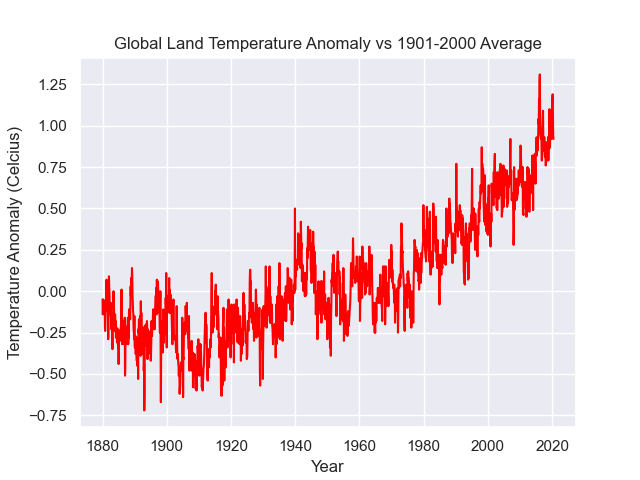

In [7]:
# generate the plot
fig = plt.figure()
ax = fig.gca()
plt.plot( df.Year
        , df.Value
        , c = "red"
        )
ax.set_xlabel("Year")
ax.set_ylabel("Temperature Anomaly (Celcius)")
plt.title("Global Land Temperature Anomaly vs 1901-2000 Average")
plt.savefig("GlobalLandSeaTemperatureAnomaly.png")
plt.show()

In [45]:
class Anomaly():
    
    def __init__(self, dates, anomalies, fitType = "linear", initparams = None):
        self.dates = np.double(dates)
        self.anomalies = np.double(anomalies)
        self.fitType = fitType
        self.initparams = initparams
        if self.fitType=="linear" and self.initparams is None: self.initparams = [0,0]
        if self.fitType=="exp" and self.initparams is None: self.initparams = [0,1,0]
            
    def predictLinear(self,params,dates):
        # first element of params is intercept
        # second element of params is slope
        return params[0] + params[1] * dates
    
    def predictExp(self,params,dates):
        return params[0] + np.exp( params[1] * dates - params[2] )
    
    def getSumDistSq(self,params):
        if self.fitType=="linear": return np.sum( (self.anomalies - self.predictLinear(params,self.dates) )**2 )
        if self.fitType=="exp": return np.sum( (self.anomalies - self.predictExp(params,self.dates) )**2 )

In [46]:
df.Year[1200]

1980.0

In [47]:
startPoint = 1200
anomaly = Anomaly( dates = df.Year[startPoint:]
                 , anomalies = df.Value[startPoint:]
                 )

In [48]:
bestFitParams = fmin( func = anomaly.getSumDistSq
                    , x0 = anomaly.initparams
                    )

Optimization terminated successfully.
         Current function value: 8.456157
         Iterations: 86
         Function evaluations: 160


In [49]:
bestFitParams

array([-3.53283709e+01,  1.79269681e-02])

<IPython.core.display.Javascript object>


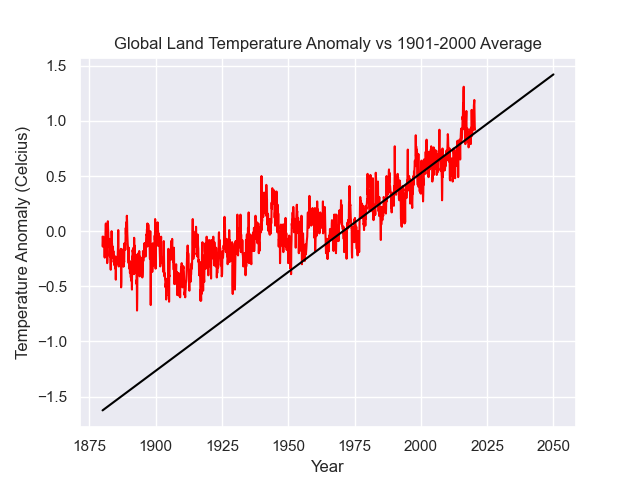

In [50]:
# generate the plot
fig = plt.figure()
ax = fig.gca()
plt.plot( df.Year
        , df.Value
        , c = "red"
        )
ax.set_xlabel("Year")
ax.set_ylabel("Temperature Anomaly (Celcius)")
plt.title("Global Land Temperature Anomaly vs 1901-2000 Average")
datesRange = np.linspace(1880,2050,1000)
plt.plot( datesRange
        , anomaly.predictLinear(params = bestFitParams, dates = datesRange)
        , c= "black"
        )
plt.show()
plt.savefig("GlobalLandSeaTemperatureAnomalyLinear.png")

In [52]:
df.Year[840]

1950.0

In [53]:
startPoint = 840
anomaly = Anomaly( dates = df.Year[startPoint:]-1950
                 , anomalies = df.Value[startPoint:]
                 , fitType = "exp"
                 )

In [54]:
bestFitParams = fmin( func = anomaly.getSumDistSq
                    , x0 = [-1,.01,0]
                    )
bestFitParams

Optimization terminated successfully.
         Current function value: 15.109840
         Iterations: 165
         Function evaluations: 295


array([-0.31402879,  0.02366648,  1.41045891])

<IPython.core.display.Javascript object>


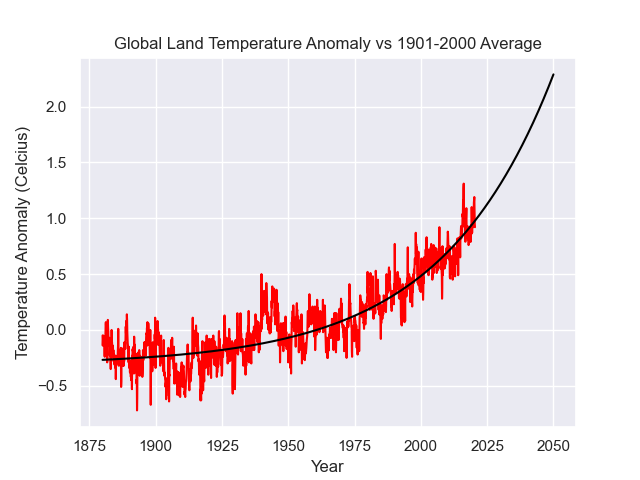

In [55]:
# generate the plot
fig = plt.figure()
ax = fig.gca()
plt.plot( df.Year
        , df.Value
        , c = "red"
        )
ax.set_xlabel("Year")
ax.set_ylabel("Temperature Anomaly (Celcius)")
plt.title("Global Land Temperature Anomaly vs 1901-2000 Average")
datesRange = np.linspace(1880-1950,2050-1950,1000)
plt.plot( datesRange + 1950
        , anomaly.predictExp(params = bestFitParams, dates = datesRange)
        , c= "black"
        )
plt.savefig("GlobalLandSeaTemperatureAnomalyExp.png")
plt.show()